# CARGA DEL FICHERO



In [ ]:
import pandas as pd
import numpy as np
import math
import re
from bs4 import BeautifulSoup

data = pd.read_json("/content/clasificador.json", encoding='latin1')
data

text age_range
0      @gusgomez1701 @YaKoDj @TropiBogota @Apple @Hua...     50-64
1      @jlmorales5 Sol Campbell, Per Mertesacker, Ver...     13-17
2      LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...     18-24
3                                        @munqueik roba3     18-24
4                                         Necesito ayuda     18-24
...                                                  ...       ...
29995  @IrreverentesCol @SecPompeo ¿Como estará Ivan ...     35-49
29996  @GloriaAlvarez85 @Unbrokensecuri1 @Marco0301 @...     13-17
29997  Creo firmemente q si buena parte de la poblaci...     65-xx
29998  @CristoBustos @DanielSamperO Supuestamente el ...     50-64
29999                @BTS_twt ESTÁS BIEN PRECIOSO!!! 🤩💜💜     18-24

[30000 rows x 2 columns]

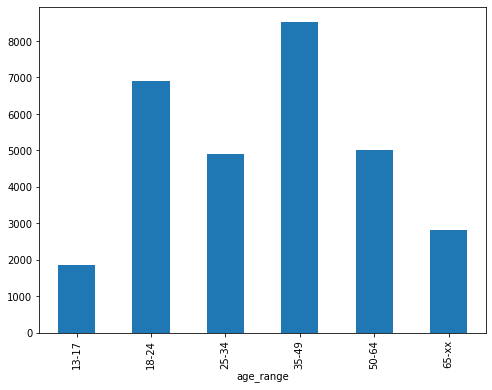

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('age_range').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
try: 
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds

# Pre Procesado de Datos

In [ ]:
def clean_tweet(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
  #Eliminamos la @ y su mencion
  tweet = re.sub(r'@[A-Za-z0-9]+', ' ', tweet)
  #Eliminamos los links de las URLs
  tweet = re.sub(r'https?://[A-Za-z0-9./]+', ' ', tweet)
  #Nos quedamos solamente con los caracteres
  tweet = re.sub(r'[^a-zA-Z.!?´]', ' ', tweet)
  #Eliminamos espacios en blanco adicionales
  tweet = re.sub(r' +', ' ', tweet)
  return tweet


In [ ]:
data_clean = [clean_tweet(tweet) for tweet in data.text]

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/KLjlQwXirT" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://t.co/ANaB1xp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/smOKHp4ab1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.

In [ ]:
data_clean

[' Cual modelo de huawei tiene don Gustavo?',
 ' Sol Campbell Per Mertesacker Vermaelen y chapa la yapa con Kolo Tour .',
 'LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO POR EL ASESINATO SELECTIVO v a Abeja',
 ' roba ',
 'Necesito ayuda',
 ' Redd Bueno no se arranca perdiendo ',
 ' Que esta vez entraron los goles Junior viene jugando bien hace rato.',
 ' . un n mero Exacto? ',
 ' betancourtm Yo tmbn. Pero el placer est precisamente en eso en leerlas sentir como reverberan en tu cerebro consideraciones sensatas apreciaciones agudas cosas q no hab as pensado siempre fuera del mainstream cloacal del Tw.Ser a como tragar una delicia de un bocado sin paladearla. Sds!',
 ' que curioso en MercadoLibre Mexico se consigue esa misma cajita ',
 ' Que aburrido',
 ' serrano Feliz Navidad amiga',
 'EL ASESINO CACAS. ',
 ' Los DeLaMecha Wilmer Cabrera Eduardo ni o N stor Salazar Wilson P rez Giovanni Hern ndez John Edison casta o Alexis Mendoza Luis Barbat Adri n berbia .',
 'I hate Hipsters their s

# Tokenizacion

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    data_clean, target_vocab_size=2**16
)


data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

# Padding

In [ ]:
MAX_LEN = max([len(sentence) for sentence in data_inputs])
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value=0,
                                                            padding='post',
                                                            maxlen=MAX_LEN)

In [ ]:
data_text = pd.DataFrame(data_clean, columns=['text'])
data_text

text
0               Cual modelo de huawei tiene don Gustavo?
1       Sol Campbell Per Mertesacker Vermaelen y chap...
2      LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...
3                                                  roba 
4                                         Necesito ayuda
...                                                  ...
29995   Como estar Ivan Cepeda y los amigos de la Paz...
29996   No no no es que desde ahora personalmente te ...
29997  Creo firmemente q si buena parte de la poblaci...
29998   Supuestamente el brazo armado de las farc ent...
29999                        twt EST S BIEN PRECIOSO!!! 

[30000 rows x 1 columns]

In [ ]:
data_text1 = pd.DataFrame(data_inputs)
data_text1

0      1      2     3      4      5   ...  62  63  64  65  66  67
0      56622   1272   1954     1  32659     60  ...   0   0   0   0   0   0
1      56622  12556  54065  1694  48273  43504  ...   0   0   0   0   0   0
2        159  53075  54365   413  12642    159  ...   0   0   0   0   0   0
3      56622   5841      0     0      0      0  ...   0   0   0   0   0   0
4       1308   1995      0     0      0      0  ...   0   0   0   0   0   0
...      ...    ...    ...   ...    ...    ...  ...  ..  ..  ..  ..  ..  ..
29995  56622    180    109  3629   1234      5  ...   0   0   0   0   0   0
29996  56622     34      8     8     10      2  ...   0   0   0   0   0   0
29997    482  34031     35    29    272    189  ...   0   0   0   0   0   0
29998  56622  19044      6  6367   2464      1  ...   0   0   0   0   0   0
29999  56622    310   1771   208   3078  47045  ...   0   0   0   0   0   0

[30000 rows x 68 columns]

In [ ]:
# Aquí iría el drop del conjunto data
data2 = data.drop(['text'], axis=1, inplace=True)
data

age_range
0         50-64
1         13-17
2         18-24
3         18-24
4         18-24
...         ...
29995     35-49
29996     13-17
29997     65-xx
29998     50-64
29999     18-24

[30000 rows x 1 columns]

In [ ]:
data_complete1 = pd.concat([data_text, data], axis=1)
data_complete1

text age_range
0               Cual modelo de huawei tiene don Gustavo?     50-64
1       Sol Campbell Per Mertesacker Vermaelen y chap...     13-17
2      LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...     18-24
3                                                  roba      18-24
4                                         Necesito ayuda     18-24
...                                                  ...       ...
29995   Como estar Ivan Cepeda y los amigos de la Paz...     35-49
29996   No no no es que desde ahora personalmente te ...     13-17
29997  Creo firmemente q si buena parte de la poblaci...     65-xx
29998   Supuestamente el brazo armado de las farc ent...     50-64
29999                        twt EST S BIEN PRECIOSO!!!      18-24

[30000 rows x 2 columns]

In [ ]:
cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
                  '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
                  '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', 'age_range']
data_complete = pd.concat([data_text1, data], names = cols, axis=1)
data_complete #Este es el que se usa por estar tokenizado

0      1      2     3      4      5  ...  63  64  65  66  67  age_range
0      56622   1272   1954     1  32659     60  ...   0   0   0   0   0      50-64
1      56622  12556  54065  1694  48273  43504  ...   0   0   0   0   0      13-17
2        159  53075  54365   413  12642    159  ...   0   0   0   0   0      18-24
3      56622   5841      0     0      0      0  ...   0   0   0   0   0      18-24
4       1308   1995      0     0      0      0  ...   0   0   0   0   0      18-24
...      ...    ...    ...   ...    ...    ...  ...  ..  ..  ..  ..  ..        ...
29995  56622    180    109  3629   1234      5  ...   0   0   0   0   0      35-49
29996  56622     34      8     8     10      2  ...   0   0   0   0   0      13-17
29997    482  34031     35    29    272    189  ...   0   0   0   0   0      65-xx
29998  56622  19044      6  6367   2464      1  ...   0   0   0   0   0      50-64
29999  56622    310   1771   208   3078  47045  ...   0   0   0   0   0      18-24

[30000 rows x 69 columns]

In [ ]:
data_complete['age_range'] = data_complete['age_range'].replace(['13-17', '18-24', '25-34', '35-49', '50-64', '65-xx'],[1, 2, 3, 4, 5, 6])
data_complete

# El rango de edad 13-17 fue reemplazado por la categoria 1
# El rango de edad 18-24 fue reemplazado por la categoria 2
# El rango de edad 25-34 fue reemplazado por la categoria 3
# El rango de edad 35-49 fue reemplazado por la categoria 4
# El rango de edad 50-64 fue reemplazado por la categoria 5
# El rango de edad 65-xx fue reemplazado por la categoria 6

0      1      2     3      4      5  ...  63  64  65  66  67  age_range
0      56622   1272   1954     1  32659     60  ...   0   0   0   0   0          5
1      56622  12556  54065  1694  48273  43504  ...   0   0   0   0   0          1
2        159  53075  54365   413  12642    159  ...   0   0   0   0   0          2
3      56622   5841      0     0      0      0  ...   0   0   0   0   0          2
4       1308   1995      0     0      0      0  ...   0   0   0   0   0          2
...      ...    ...    ...   ...    ...    ...  ...  ..  ..  ..  ..  ..        ...
29995  56622    180    109  3629   1234      5  ...   0   0   0   0   0          4
29996  56622     34      8     8     10      2  ...   0   0   0   0   0          1
29997    482  34031     35    29    272    189  ...   0   0   0   0   0          6
29998  56622  19044      6  6367   2464      1  ...   0   0   0   0   0          5
29999  56622    310   1771   208   3078  47045  ...   0   0   0   0   0          2

[30000 rows x 69 columns]

In [ ]:

from sklearn.model_selection import train_test_split

x = data_complete.drop(['age_range'], axis=1)

y = data_complete['age_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creación del modelo Red Neuronal

In [ ]:
class DCNN(tf.keras.Model):
  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               FFN_units=512,
               nb_classes=6, 
               dropout_rate=0.1,
               training=False,
               name='dcnn'):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size,
                                      emb_dim)
    self.bigram = layers.Conv1D(filters=nb_filters,
                                kernel_size=2,
                                padding='valid',
                                activation='relu')
    self.trigram = layers.Conv1D(filters=nb_filters,
                                kernel_size=3,
                                padding='valid',
                                activation='relu')
    self.fourgram = layers.Conv1D(filters=nb_filters,
                                kernel_size=4,
                                padding='valid',
                                activation='relu')
    #self.fivegram = layers.Conv1D(filters=nb_filters,
    #                            kernel_size=5,
    #                            padding='valid',
    #                            activation='relu')
    self.pool = layers.GlobalMaxPooling1D()

    self.Dense_1 = layers.Dense(units=FFN_units, activation='relu')
    self.dropout = layers.Dropout(rate=dropout_rate)
    self.last_dense = layers.Dense(units=nb_classes, activation='softmax')
      
  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)
    #x_4 = self.fivegram(x)
    #x_4 = self.pool(x_4)

    merged = tf.concat([x_1, x_2, x_3], axis=-1)
    merged = self.Dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

# Aplicación

In [ ]:
VOCAB_SIZE = tokenizer.vocab_size

EMB_DIM = 200
NB_FILTERS = 100
FNN_UNITS = 256
NB_CLASSES = 7

DROPOUT_RATE = 0.2

BATCH_SIZE = 100
NB_EPOCHS = 10

In [ ]:
Dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters=NB_FILTERS,
            FFN_units=FNN_UNITS,
            nb_classes=NB_CLASSES,
            dropout_rate=DROPOUT_RATE)

In [ ]:
Dcnn.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
Dcnn.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS)

Epoch 1/10
240/240 [==============================] - 79s 325ms/step - loss: 1.5876 - accuracy: 0.3614
Epoch 2/10
240/240 [==============================] - 78s 326ms/step - loss: 1.2384 - accuracy: 0.5091
Epoch 3/10
240/240 [==============================] - 79s 329ms/step - loss: 0.5496 - accuracy: 0.8064
Epoch 4/10
240/240 [==============================] - 79s 329ms/step - loss: 0.1861 - accuracy: 0.9350
Epoch 5/10
240/240 [==============================] - 78s 327ms/step - loss: 0.1298 - accuracy: 0.9507
Epoch 6/10
240/240 [==============================] - 79s 328ms/step - loss: 0.1162 - accuracy: 0.9546
Epoch 7/10
240/240 [==============================] - 78s 326ms/step - loss: 0.1110 - accuracy: 0.9540
Epoch 8/10
240/240 [==============================] - 78s 326ms/step - loss: 0.1070 - accuracy: 0.9555
Epoch 9/10
240/240 [==============================] - 78s 326ms/step - loss: 0.1053 - accuracy: 0.9568
Epoch 10/10
240/240 [==============================] - 78s 326ms/step - l

# Evaluación

In [ ]:
results = Dcnn.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print(results)

60/60 [==============================] - 4s 56ms/step - loss: 3.1135 - accuracy: 0.3437
[3.113459587097168, 0.343666672706604]


In [ ]:
Dcnn(np.array([tokenizer.encode('@DCoronell @monikquinterog Los que defienden a Carrasquilla estan declarándose corruptos al hacerlo.')]), training=False).numpy()

array([[7.9524631e-18, 4.2776566e-07, 1.0141815e-05, 3.9352101e-01,
        4.9179503e-01, 5.7741039e-02, 5.6932312e-02]], dtype=float32)

# Creación Modelo Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data_complete1.text).toarray()
labels = data_complete1.age_range

In [ ]:
features.shape

(30000, 13524)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

x_train, x_test, y_train, y_test = train_test_split(data_complete1['text'], data_complete1['age_range'], random_state = 0)
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
nb_multinomial = MultinomialNB().fit(x_train_tfidf, y_train)

In [ ]:
print(nb_multinomial.predict(count_vect.transform(['Acabo de descubrir que mi hermana hace cosas que no sabia'])))

['18-24']


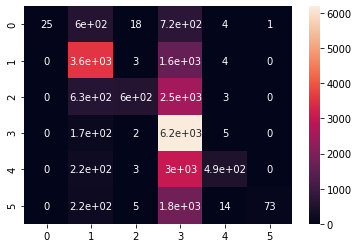

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = nb_multinomial.predict(x_train_tfidf)
y_predict_train

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

       13-17       1.00      0.02      0.04      1369
       18-24       0.66      0.68      0.67      5198
       25-34       0.95      0.16      0.27      3731
       35-49       0.39      0.97      0.56      6365
       50-64       0.94      0.13      0.23      3749
       65-xx       0.99      0.03      0.07      2088

    accuracy                           0.49     22500
   macro avg       0.82      0.33      0.31     22500
weighted avg       0.73      0.49      0.40     22500

